# Representative Accuracy Index: Getting Started with Binary Sex Representation: US Population vs Supreme Court (2023)

This is the first Jupyter notebook for the Representative Accuracy in Decision Making Index, an index whose objective is to make the inaccuracy of decisions made by individuals and groups that are not representative of the populations impacted by the former’s decision making measurable.

To establish a baseline for the index, we’ve done a comparison of the demographics on the characteristic of binary sex of the the Supreme Court of the United States (SCOTUS) to the U.S. population according to statistics from the U.S. Census Bureau. Because the U.S. Census Bureau records sex demographics according to the binary categories of male and female, we’ve followed those categorizations here to establish our project. Next iterations will focus upon incorporating statistics that acknowledge gender presentation and identity, including transgender males, transgender females, and non-binary people. Later, demographic characteristics related to race and ethnicity will also be added.

Through this work, we hope to establish a framework via which the representative accuracy (or inaccuracy) of decision makers can easily be calculated.

## Establishing a Baseline from U.S. Census Bureau and SCOTUS Data


Supreme Court Representation Analysis by Binary Sexes (2023)

Representation Analysis:
      sex  population  population_percentage  count  court_percentage  \
0    Male   165749400                  49.49      5             55.56   
1  Female   169165495                  50.51      4             44.44   

   representation_gap  
0                6.07  
1               -6.07  

Total Representation Gap: 12.1%
Accuracy Score: 93.9%


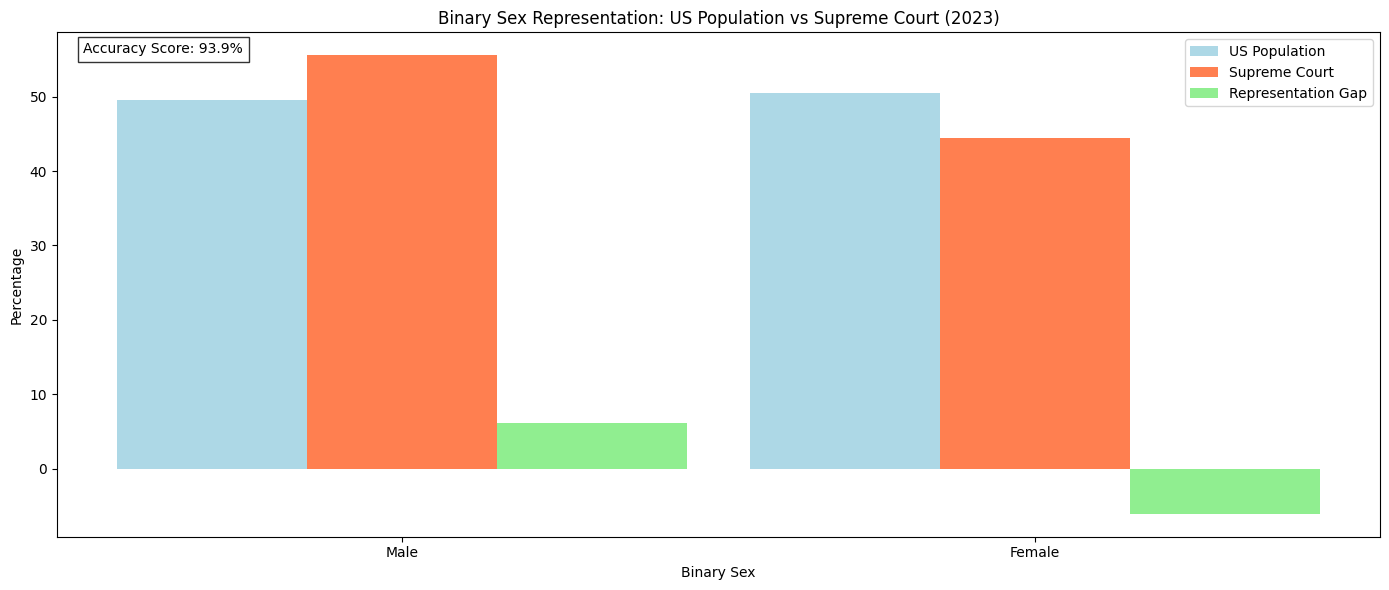


Key Findings:
- Male is over-represented by 6.1%
- Female is under-represented by 6.1%

Methodology Note:
The accuracy score is calculated by subtracting the sum of absolute representation
gaps (divided by 2) from 100%. A score of 100% would indicate perfect representation,
while lower scores indicate greater demographic misalignment.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2023 US Population Data by Binary Sexes
population_data = {
    'sex': ['Male', 'Female'],
    'population': [165749400, 169165495],  # From Census data
    'population_percentage': [49.49, 50.51]  # Calculated from Census data
}
# Source: U.S. Census Bureau. (2024). Annual Estimates of the Resident Population by Sex, Race, and Hispanic Origin for the United States: April 1, 2020 to July 1, 2023 (NC-EST2023-SR11H) [Data set]. https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-detail.html

# 2023 Supreme Court Composition by Binary Sexes
supreme_court_data = {
    'sex': ['Male', 'Female'],
    'count': [5, 4],  # 2023 composition
    'court_percentage': [55.56, 44.44]  # 5/9 and 4/9 as percentages
}
# Source: Supreme Court of the United States. (n.d.). Current members. https://www.supremecourt.gov/about/biographies.aspx

# Create DataFrames
pop_df = pd.DataFrame(population_data)
court_df = pd.DataFrame(supreme_court_data)

# Calculate representation differences
analysis_df = pd.merge(pop_df, court_df, on='sex')
analysis_df['representation_gap'] = analysis_df['court_percentage'] - analysis_df['population_percentage']

# Calculate total absolute representation gap
total_gap = abs(analysis_df['representation_gap']).sum()

# Calculate accuracy score (100% - total gap)
# We divide by 2 because the sum of absolute gaps counts each discrepancy twice
accuracy_score = 100 - (total_gap / 2)

# Display results
print("\nSupreme Court Representation Analysis by Binary Sexes (2023)")
print("=" * 50)
print("\nRepresentation Analysis:")
print(analysis_df.round(2))
print(f"\nTotal Representation Gap: {total_gap:.1f}%")
print(f"Accuracy Score: {accuracy_score:.1f}%")

# Create visualization
plt.figure(figsize=(14, 6))
bar_width = 0.30
index = np.arange(len(analysis_df['sex']))

plt.bar(index, analysis_df['population_percentage'], bar_width,
        label='US Population', color='lightblue')
plt.bar(index + bar_width, analysis_df['court_percentage'], bar_width,
        label='Supreme Court', color='coral')
plt.bar(index + 2*bar_width, analysis_df['representation_gap'], bar_width,
        label='Representation Gap', color='lightgreen')

plt.xlabel('Binary Sex')
plt.ylabel('Percentage')
plt.title('Binary Sex Representation: US Population vs Supreme Court (2023)')
plt.xticks(index + bar_width, analysis_df['sex'])
plt.legend()

# Add a text box with the accuracy score
plt.text(0.02, 0.98, f'Accuracy Score: {accuracy_score:.1f}%',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')

plt.tight_layout()
plt.show()

# Recommendations based on representation gaps
print("\nKey Findings:")
for _, row in analysis_df.iterrows():
    gap = row['representation_gap']
    if abs(gap) > 1:  # Only show significant gaps
        direction = "over-represented" if gap > 0 else "under-represented"
        print(f"- {row['sex']} is {direction} by {abs(gap):.1f}%")

print("\nMethodology Note:")
print("The accuracy score is calculated by subtracting the sum of absolute representation")
print("gaps (divided by 2) from 100%. A score of 100% would indicate perfect representation,")
print("while lower scores indicate greater demographic misalignment.")

### Next Steps
Functions to add for full analysis:


*   Function to incorporate non-binary statistics from Williams Institute
*   Function to incorporate transgender population statistics (both transgender men and transgender women)
*   Function to recalculate representation gaps with full gender spectrum
*   Function to calculate confidence intervals for population estimates



